In [ ]:
!curl -L "https://public.roboflow.com/ds/jKWiUCAaQr?key=8nr6JnivGv" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: test/images/peach-leaf-10223898_jpg.rf.8cf85585c72ba2ee682c791d88a311f6.jpg  
 extracting: test/images/strawberry-leaves-stock-picture-948708_jpg.rf.8ba8314b55217861efaaf24580fc3d30.jpg  
 extracting: test/images/02c_jpg.rf.8ccc7cfab5597c03b0c2f83f7f0f1df3.jpg  
 extracting: test/images/backus-056-potato-blight_jpg.rf.8b1c7d3597fbc4c1886d70b5880cb8f5.jpg  
 extracting: test/images/GREEN%20BELL%20PLANT%20YELLOW%20LEAF_JPG_jpg.rf.8e881f6dbafd571a3fd56d572d3f3be1.jpg  
 extracting: test/images/1421_0_jpeg?itok=FMtmgePj_jpg.rf.90c5eeac8b692e14f44e820966da13b1.jpg  
 extracting: test/images/potato-early-blight-alternaria-alternata-lesion-on-a-potato-leaf-a1w1em_jpg.rf.8ee5cc79c23bb4dfd8cd6e4fd489a432.jpg  
 extracting: test/images/dscn6689_jpg.rf.904696395f42c775453f970be794377d.jpg  
 extracting: test/images/1b321015-6e33-4f18-aade-888f4383fe92_jpeg_jpg.rf.8e50dcca0004491260c481995288b250.jpg  
 extracting: test/images/12-19st

In [ ]:
! git clone https://github.com/ultralytics/yolov5 
! cd yolov5
! pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 12408, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 12408 (delta 1), reused 6 (delta 1), pack-reused 12401
Receiving objects: 100% (12408/12408), 11.57 MiB | 18.11 MiB/s, done.
Resolving deltas: 100% (8626/8626), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
! pip install -r /content/yolov5/requirements.txt

     |████████████████████████████████| 596 kB 8.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
from IPython.display import Image, clear_output  # To display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.10.0+cu111 (Tesla P100-PCIE-16GB)





# YOLOv5 Architecture!
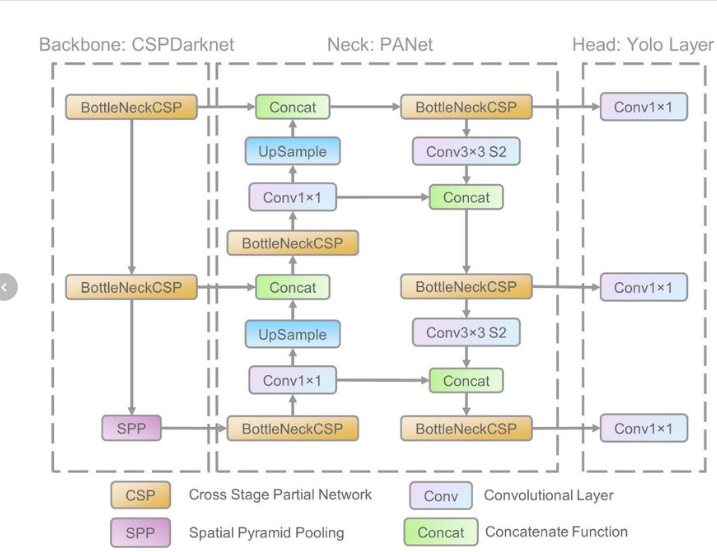


In [ ]:
%cat /content/yolov5/models/yolov5n.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.25  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))         

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5n.yaml            
 
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 34  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.25  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!mv '/content/data.yaml' '/content/yolov5'

In [ ]:
%%time
!python train.py --img 460 --batch 16 --epochs 300 --data data.yaml --cfg models/yolov5n.yaml --cache

train: weights=yolov5s.pt, cfg=models/yolov5n.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=460, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-83-g37675e1 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translat

In [ ]:
!zip -r '/content/sfs_run00.zip' '/content/yolov5/runs/train/exp3'

  adding: content/yolov5/runs/train/exp3/ (stored 0%)
  adding: content/yolov5/runs/train/exp3/val_batch2_labels.jpg (deflated 10%)
  adding: content/yolov5/runs/train/exp3/labels_correlogram.jpg (deflated 23%)
  adding: content/yolov5/runs/train/exp3/hyp.yaml (deflated 45%)
  adding: content/yolov5/runs/train/exp3/val_batch1_pred.jpg (deflated 9%)
  adding: content/yolov5/runs/train/exp3/PR_curve.png (deflated 8%)
  adding: content/yolov5/runs/train/exp3/confusion_matrix.png (deflated 15%)
  adding: content/yolov5/runs/train/exp3/labels.jpg (deflated 14%)
  adding: content/yolov5/runs/train/exp3/train_batch1.jpg (deflated 2%)
  adding: content/yolov5/runs/train/exp3/weights/ (stored 0%)
  adding: content/yolov5/runs/train/exp3/weights/best.pt (deflated 13%)
  adding: content/yolov5/runs/train/exp3/weights/last.pt (deflated 13%)
  adding: content/yolov5/runs/train/exp3/results.csv (deflated 84%)
  adding: content/yolov5/runs/train/exp3/R_curve.png (deflated 8%)
  adding: content/yolov5

In [ ]:
!cd /content

In [ ]:
!unzip 'run00.zip' -d '.'

Archive:  run00.zip
  inflating: ./content/yolov5/runs/train/exp2/val_batch0_pred.jpg  
  inflating: ./content/yolov5/runs/train/exp2/val_batch0_labels.jpg  
  inflating: ./content/yolov5/runs/train/exp2/val_batch2_pred.jpg  
  inflating: ./content/yolov5/runs/train/exp2/R_curve.png  
  inflating: ./content/yolov5/runs/train/exp2/opt.yaml  
  inflating: ./content/yolov5/runs/train/exp2/train_batch1.jpg  
  inflating: ./content/yolov5/runs/train/exp2/labels_correlogram.jpg  
  inflating: ./content/yolov5/runs/train/exp2/results.png  
  inflating: ./content/yolov5/runs/train/exp2/val_batch1_pred.jpg  
  inflating: ./content/yolov5/runs/train/exp2/confusion_matrix.png  
  inflating: ./content/yolov5/runs/train/exp2/events.out.tfevents.1643291255.9f4fd43c95a6.1013.0  
  inflating: ./content/yolov5/runs/train/exp2/val_batch2_labels.jpg  
  inflating: ./content/yolov5/runs/train/exp2/F1_curve.png  
  inflating: ./content/yolov5/runs/train/exp2/P_curve.png  
  inflating: ./content/yolov5/runs